# Summary Stats

In [37]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from source import Vermont_Farm
VF = Vermont_Farm()
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [2]:
prices = pd.read_csv("./Hist_Firm_mathodology_table_Variable_name_final.csv")

In [3]:
prices = prices.drop("2023 price", axis=1)

In [4]:
# prices.to_csv("sum_stats_var_name_price.csv")

# read in `df50` and `df60`

In [5]:
df50 = pd.read_csv("./1850final_w_TotalOutput.csv")
df60 = pd.read_csv("./1860final_w_TotalOutput.csv")

In [6]:
df60.groupby(['milkcow'])[['wheat']].aggregate([np.mean, len]).round(3)

wheat    
           mean len
milkcow            
1         6.154  13
2        17.577  52
3        28.677  31
4        38.300  30
5        32.100  10
6        39.000  12
7        51.000   2
8         8.000   1
9        20.000   3
10       32.500   2
12       30.000   1
13       40.000   1
18       13.000   1

In [7]:
df50 = df50[['horse', 'mules', 'milkcow', 'oxen',
       'cattle', 'sheep', 'swine', 'livestock_val', 
       'wheat', 'rye', 'corn',
       'oats', 'rice', 'tobacco', 'cotton', 'wool', 'peas', 'potatos',
       'sweetpotatos', 'barley', 'buckwheat', 'orchid_val', 'wine',
       'produce_val', 'butter', 'cheese', 'hay', 'clover',
       'hops', 'hemp_dewrot', 'hemp_waterrot', 'flax', 'flaxseed', 'silk',
       'maplesugar', 'canesugar', 'molasses', 'beewax', 'manufactures_val',
       'animals_val']] 
df50mean = df50.mean()
df50median = df50.median()
df50max = df50.max()

In [8]:
df60 = df60[['horse', 'mules', 'milkcow', 'oxen',
       'cattle', 'sheep', 'swine', 'livestock_val', 
       'wheat', 'rye', 'corn',
       'oats', 'rice', 'tobacco', 'cotton', 'wool', 'peas', 'potatos',
       'sweetpotatos', 'barley', 'buckwheat', 'orchid_val', 'wine',
       'produce_val', 'butter', 'cheese', 'hay', 'clover', 
       'hops', 'hemp_dewrot', 'hemp_waterrot', 'flax', 'flaxseed', 'silk',
       'maplesugar', 'canesugar', 'molasses', 'beewax', 'manufactures_val',
       'animals_val']] 
df60mean = df60.mean()
df60median = df60.median()
df60max = df60.max()

In [9]:
df50mean = df50mean.to_frame()
df50median = df50median.to_frame()
df50max = df50max.to_frame()
df60mean = df60mean.to_frame()
df60median = df60median.to_frame()
df60max = df60max.to_frame()

In [10]:
df50mean[1] = df50median 
df50mean[2] = df50max 
df50mean[3] = df60mean 
df50mean[4] = df60median
df50mean[5] = df60max

In [11]:
df_mean = df50mean.rename({0: "Mean with 1850 data",
                           1: "Median with 1850 data",
                           2: "Maximum with 1850 data",
                           3: "Mean with 1860 data",
                           4: "Median with 1860 data",
                           5: "Maximum with 1860 data",
                           }, axis=1)

In [12]:
df_mean = df_mean.round(3)

In [13]:
df_mean.to_csv("df_mean.csv")

In [14]:
df50sum = df50.sum(axis=0)
df60sum = df60.sum(axis=0)

In [15]:
df50sum = df50sum.to_frame()
df60sum = df60sum.to_frame()

In [16]:
df50sum[1] = df60sum 

In [17]:
df_total = df50sum.rename({0: "Total count of all farms, 1850 data",
                           1: "Total count of all farms, 1860 data",
                           }, axis=1)

In [18]:
df_total = df_total.round(2)

In [19]:
df_total.to_csv("df_total.csv")

# Final `group_by` table with diversity score, entropy score

In [20]:
df50 = pd.read_csv("./1850diversity_score.csv")
df60 = pd.read_csv("./1860diversity_score.csv")

In [21]:
df50["year"] = 1850
df60["year"] = 1860

In [22]:
df50 = df50.drop(columns="rown")

In [23]:
df50 = df50.drop(columns=["other_grass"])
df60 = df60.drop(columns=["grass","honey"])

In [24]:
df_big = pd.concat([df50,df60])

In [25]:
print(df50.shape)
# print(df50.columns)
print(df60.shape)
# print(df60.columns)
print(df_big.columns)

(170, 68)
(159, 69)
Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Name', 'improved',
       'unimproved', 'cash_val', 'machine_val', 'horse', 'mules', 'milkcow',
       'oxen', 'cattle', 'sheep', 'swine', 'livestock_val', 'wheat', 'rye',
       'corn', 'oats', 'rice', 'tobacco', 'cotton', 'wool', 'peas', 'potatos',
       'sweetpotatos', 'barley', 'buckwheat', 'orchid_val', 'wine',
       'produce_val', 'butter', 'cheese', 'hay', 'clover', 'hops',
       'hemp_dewrot', 'hemp_waterrot', 'flax', 'flaxseed', 'silk',
       'maplesugar', 'canesugar', 'molasses', 'beewax', 'manufactures_val',
       'animals_val', 'pg_num', 'year', 'town', 'total_output',
       'revenue_per_land', 'entropy_score', 'log_improved', 'log_unimproved',
       'log_cash_val', 'log_machine_val', 'log_horse', 'log_mules',
       'log_milkcow', 'log_total_output', 'log_reg_predict', 'reg_predict',
       'log_TFP', 'TFP', 'binary_TFP', 'diversity_score', 'hemp_other'],
      dtype='object')


In [26]:
df60['diversity_score']

0      17
1      12
2      17
3      21
4      16
       ..
154    15
155    14
156    14
157    17
158    15
Name: diversity_score, Length: 159, dtype: int64

In [27]:
# table = df_big.groupby(['binary_TFP', "year"])[['improved', 'unimproved',
#                                                 'cash_val', 'machine_val', 
#                                                 'horse', 'mules', 'milkcow',
#                                                 'total_output',
#                                                 'entropy_score', 'diversity_score',
#                                                 'revenue_per_land', 'TFP']].aggregate([len, np.mean, np.std, np.median, np.min, np.max]).round(3)

In [28]:
table = df_big.groupby(['binary_TFP', "year"])[['improved', 'unimproved',
                                                'cash_val', 'machine_val', 
                                                'horse', 'mules', 'milkcow',
                                                'total_output',
                                                'entropy_score', 'diversity_score',
                                                'revenue_per_land', 'TFP']].aggregate([len, np.mean, np.median, np.max]).round(3)

In [29]:
table

improved                     unimproved                        
                     len    mean median amax        len    mean median  amax   
binary_TFP year                                                                
0          1850      105  76.581   60.0  350        105  40.867   20.0  1000  \
           1860       76  95.855   72.5  330         76  24.224   12.0   220   
1          1850       65  89.092   65.0  400         65  34.000   24.0   183   
           1860       83  92.072   90.0  270         83  24.711   15.0   150   

                cash_val            ... diversity_score      revenue_per_land   
                     len      mean  ...          median amax              len   
binary_TFP year                     ...                                         
0          1850      105  2096.524  ...            18.0   23              105  \
           1860       76  3844.197  ...            15.0   23               76   
1          1850       65  2468.308  ...            19.0   23               65   
           1860       83  3841.265  ...            17.0   21               83   

                                            TFP                                 
                    mean   median     amax  len      mean    median       amax  
binary_TFP year                                                                 
0          1850   66.897   60.635  157.848  105  -788.662  -549.497      0.000  
           1860    8.218    7.920   20.924   76  -168.655  -105.662     -2.622  
1          1850  116.916  108.868  403.958   65  1989.738  1079.509  16933.962  
           1860   12.927   11.372   38.388   83   246.981   142.221   2476.339  

[4 rows x 48 columns]

In [30]:
table_T = table.transpose()

In [31]:
table_T.to_csv("output_summary_transpose.csv")

# testing

In [32]:
tabl = df_big.groupby(['binary_TFP', "year"])[[
                                                'revenue_per_land', 'TFP']].aggregate([len, np.mean]).round(3)

In [33]:
tabl.transpose()

binary_TFP                   0                  1         
year                      1850     1860      1850     1860
revenue_per_land len   105.000   76.000    65.000   83.000
                 mean   66.897    8.218   116.916   12.927
TFP              len   105.000   76.000    65.000   83.000
                 mean -788.662 -168.655  1989.738  246.981

In [34]:
# doesn't work
pd.pivot_table(tabl,   values=[
                                'revenue_per_land', 'TFP'], 
                        index = ['binary_TFP','year'], 
                        columns=['len', 'mean'])

TFP           revenue_per_land         
              len      mean              len     mean
binary_TFP  105.0  -788.662            105.0   66.897
len          65.0  1989.738             65.0  116.916
mean         83.0   246.981             83.0   12.927
year         76.0  -168.655             76.0    8.218

# Herfindahl index

In [59]:
df50 = pd.read_csv("./1850final_w_TotalOutput.csv")
df60 = pd.read_csv("./1860final_w_TotalOutput.csv")

In [60]:
df50["log_diversity_score"] = np.log(df50['herfindahl_score'].to_numpy())
df50["log_entropy_score"] = np.log(df50['entropy_score'].to_numpy())
df50["log_rev_per_land"] = np.log(df50['revenue_per_land'].to_numpy())
df60["log_diversity_score"] = np.log(df60['herfindahl_score'].to_numpy())
df60["log_entropy_score"] = np.log(df60['entropy_score'].to_numpy())
df60["log_rev_per_land"] = np.log(df60['revenue_per_land'].to_numpy())

In [61]:
reg1 = smf.ols("TFP ~ herfindahl_score", data=df50).fit()
reg2 = smf.ols("revenue_per_land ~ herfindahl_score", data=df50).fit()
reg3 = smf.ols("log_rev_per_land ~ herfindahl_score", data=df50).fit()
reg4 = smf.ols("TFP ~ herfindahl_score", data=df60).fit()
reg5 = smf.ols("revenue_per_land ~ herfindahl_score", data=df60).fit()
reg6 = smf.ols("log_rev_per_land ~ herfindahl_score", data=df60).fit()

In [62]:
print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:       log_rev_per_land   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.467
Date:                Sat, 20 May 2023   Prob (F-statistic):             0.0361
Time:                        16:19:40   Log-Likelihood:                -97.871
No. Observations:                 159   AIC:                             199.7
Df Residuals:                     157   BIC:                             205.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0409      0.368  

In [63]:
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6])
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) \\
\hline \\[-1.8ex]
 Intercept & -1118.727$^{**}$ & 107.911$^{***}$ & 4.653$^{***}$ & 1547.306$^{***}$ & 27.189$^{***}$ & 3.041$^{***}$ \\
  & (519.389) & (12.214) & (0.129) & (269.292) & (4.010) & (0.368) \\
 herfindahl_score & 3320.281$^{***}$ & -52.196$^{*}$ & -0.884$^{***}$ & -1960.456$^{***}$ & -21.597$^{***}$ & -1.012$^{**}$ \\
  & (1163.620) & (27.364) & (0.290) & (350.526) & (5.220) & (0.479) \\
\hline \\[-1.8ex]
 Observations & 170 & 170 & 170 & 159 & 159 & 159 \\
 $R^2$ & 0.046 & 0.021 & 0.053 & 0.166 & 0.098 & 0.028 \\
 Adjusted $R^2$ & 0.041 & 0.015 & 0.047 & 0.161 & 0.093 & 0.021 \\
 Residual Std. Error & 2319.361(df = 168) & 54.544(df = 168) & 0.577(df = 168) & 330.007(df = 157) & 4.915(df = 157) & 0.451(df = 157)  \\
 F Statistic & 8.142$^{***}$ (df = 1.0; 168.0) & 3.638$^{*}$ (df = 1.0; 168.0) & 9.319$^{***}$ (df

<AxesSubplot:xlabel='herfindahl_score', ylabel='TFP'>

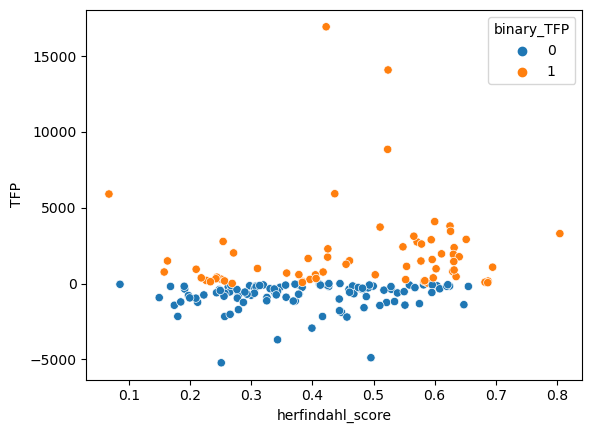

In [64]:
sns.scatterplot(data=df50, x='herfindahl_score', y='TFP', hue='binary_TFP')

<AxesSubplot:xlabel='herfindahl_score', ylabel='revenue_per_land'>

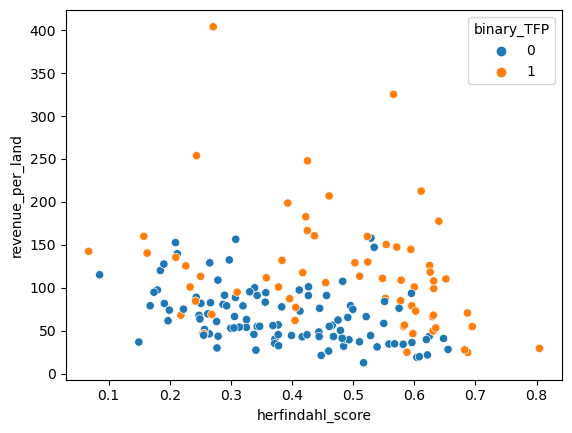

In [47]:
sns.scatterplot(data=df50, x='herfindahl_score', y='revenue_per_land', hue='binary_TFP')

<AxesSubplot:xlabel='herfindahl_score', ylabel='log_rev_per_land'>

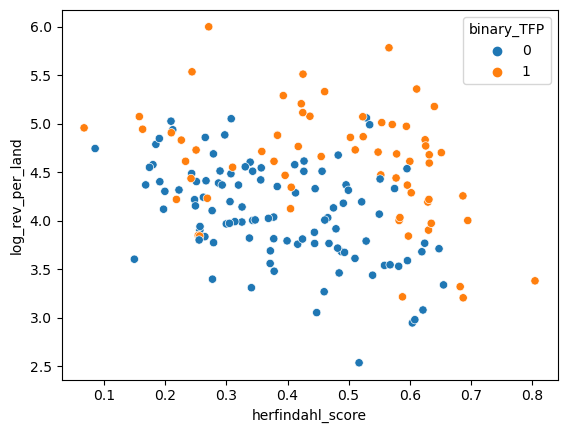

In [49]:
sns.scatterplot(data=df50, x='herfindahl_score', y='log_rev_per_land', hue='binary_TFP')

<AxesSubplot:xlabel='herfindahl_score', ylabel='TFP'>

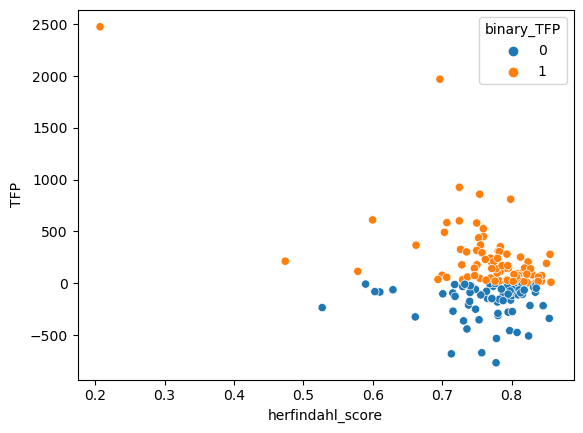

In [57]:
sns.scatterplot(data=df60, x='herfindahl_score', y='TFP', hue='binary_TFP')

<AxesSubplot:xlabel='herfindahl_score', ylabel='revenue_per_land'>

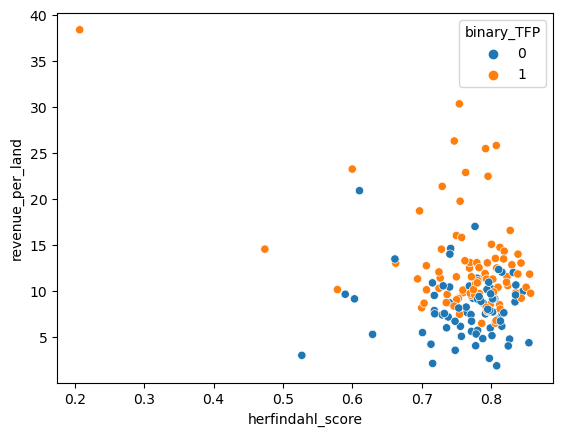

In [56]:
sns.scatterplot(data=df60, x='herfindahl_score', y='revenue_per_land', hue='binary_TFP')

<AxesSubplot:xlabel='herfindahl_score', ylabel='log_rev_per_land'>

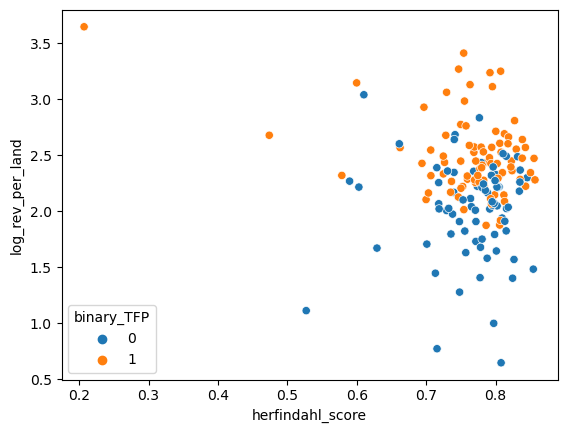

In [58]:
sns.scatterplot(data=df60, x='herfindahl_score', y='log_rev_per_land', hue='binary_TFP')
